# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF25_pml4hep/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning


/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [3]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.metrics.NPLM import candidate_sigma
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_bisection_np ,compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/100D_unimodal/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2025-03-02 20:00:03.548716: Importing os...
2025-03-02 20:00:03.548953: Importing sys...
Visible devices: [3]
2025-03-02 20:00:03.549185: Importing timer from timeit...
2025-03-02 20:00:03.549261: Setting env variables for tf import (only device(s) [3] will be available)...
2025-03-02 20:00:03.549385: Importing numpy...
2025-03-02 20:00:03.673215: Importing matplotlib...
2025-03-02 20:00:04.016418: Importing h5py...
2025-03-02 20:00:04.048459: Importing importlib.util...
2025-03-02 20:00:04.048564: Importing json...
2025-03-02 20:00:04.048626: Importing pandas...
2025-03-02 20:00:04.489480: Importing random...
2025-03-02 20:00:04.489617: Importing scipy utils...
2025-03-02 20:00:04.964118: Importing subprocess...
2025-03-02 20:00:04.964256: Importing tensorflow...
Tensorflow version: 2.16.1
2025-03-02 20:00:08.307658: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2025-03-02 20:00:09.439856: Importing timeit...
2025-03-02 20:00:09.439963: Importing tqdm...
2

/leonardo_scratch/fast/INF25_pml4hep/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2025-03-02 20:00:16.222793: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #3, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2025-03-02 20:00:16.270947: All done.


# Model definition

In [3]:
seed = 0
ncomp = 10
ndims = 100
niter = 20
dist_1 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
dist_2 = MixtureDistributions.MultiNormalFromMix(ncomp = ncomp,
                                                 ndims = ndims,
                                                 loc_factor = 5.,
                                                 scale_factor = 1.,
                                                 dtype = tf.float64,
                                                 seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'> <class 'tensorflow_probability.python.distributions.mvn_tril.MultivariateNormalTriL'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (100,) (100,)
sample from dist_1:  tf.Tensor(
[[  1.91445107  -2.76153434  -3.43323223   7.64576955   0.40180012
   -1.54630583   5.40504032  -2.45371653  -6.6117742    0.10771743
   -2.4273847    7.60628533   5.01479685  -0.80459746  -0.86720562
   -3.75163826  -0.69391021  -5.33313732   5.26738688  -5.78498904
    1.12458017  -4.47940648  -0.4474242   -2.59568939  -2.44898263
    1.55035606  -1.85271676  -5.47760979  -5.4891624    1.92841313
    1.80298843   1.37451324  -5.50705267  -4.87041055  -0.72087521
   -5.10871132   4.48338344 -10.6507996   -2.19847207   6.38164433
   -1.68827092   1.54153519   5.89025258   2.0636

# Fixed $n=m=100000$

## Null hypothesis

### Model definition

In [4]:
batch_size_test = 100000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K_NPLM_Par/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
    
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")

Model directory was created
Null hypothesis directory was created


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
nsamples 2000000
batch_size 100000
niter 20
niter * batch_size 2000000
small_sample False


In [7]:
flk_sigma = candidate_sigma(dist_1, perc = 90)     

Known distribution case. The distribution is the costum made MultiNormalFromMix.
The gaussian kernel sigma is estimated as the 90th percentile of the pairwise distance among 10000 points extracted from the reference distribution.
The value of sigma is: 52.6


## Lambda Times

In [8]:
lam_list = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 5000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)

lam value for NPLMMetric_0 is: 0.0001
lam value for NPLMMetric_1 is: 1e-05
lam value for NPLMMetric_2 is: 1e-06
lam value for NPLMMetric_3 is: 1e-07
lam value for NPLMMetric_4 is: 1e-08
lam value for NPLMMetric_5 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a61107b10>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a6003fa10>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a5fff2990>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a6012d010>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a60101e90>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f6a6012e5d0>}


In [15]:
name = "nplm"

file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

    for i in range(len(lam_list)):
        print(f"For lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i]} s.")

else:
    results = []
    metric_values = np.zeros((len(lam_list), niter))
    null_hp_times = np.zeros(len(lam_list))  

    for i in range(len(lam_list)):
        start = timer()
        print(f"Computing and saving {name}")
        nplm_objects[f"NPLMMetric_{i}"].Test_np()
        metric_values[i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
        end = timer()

        print(f"All done in: {end - start:.2f} s.")
        null_hp_times[i] = end - start  
        results.append({"lambda": lam_list[i], "computing_time": null_hp_times[i], "metric_list": metric_values[i].tolist()})

    with open(file, "w") as file:
        json.dump(results, file, indent=4)

File results/100D_unimodal/100D_100K_NPLM_Par/null_hypothesis/Computing_time_vs_lambda.json already exists. Loading existing results.
For lambda = 0.0001, the null hypothesis for 20 points has been calculated in 99.97107491496718 s.
For lambda = 1e-05, the null hypothesis for 20 points has been calculated in 108.31618792598601 s.
For lambda = 1e-06, the null hypothesis for 20 points has been calculated in 132.69689277099678 s.
For lambda = 1e-07, the null hypothesis for 20 points has been calculated in 163.65963049500715 s.
For lambda = 1e-08, the null hypothesis for 20 points has been calculated in 233.6173005779856 s.
For lambda = 1e-09, the null hypothesis for 20 points has been calculated in 348.9065228200052 s.


File results/100D_unimodal/100D_100K_NPLM_Par/null_hypothesis/Computing_time_vs_lambda.json already exists. Loading existing results.
[ 4.99855375  5.4158094   6.63484464  8.18298152 11.68086503 17.44532614]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


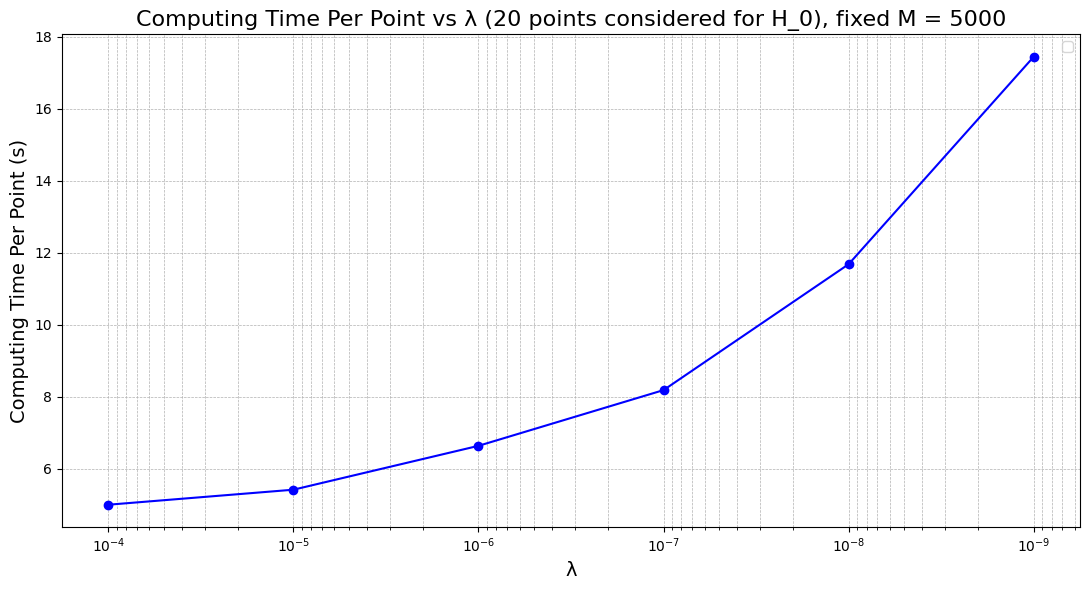

In [10]:
file = null_hypotheses_dir + f"Computing_time_vs_lambda.json"

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [entry["lambda"] for entry in results]
    lam_list = np.array(lam_list)
    null_hp_times = [entry["computing_time"] for entry in results]
    null_hp_times = np.array(null_hp_times)
    metric_values = [entry["metric_list"] for entry in results]
    metric_values = np.array(metric_values)

else:
    print("The files does not exists.")

null_hp_times_per_point = null_hp_times/niter
print(null_hp_times_per_point)

plt.figure(figsize=(11, 6))
plt.plot(lam_list, null_hp_times_per_point, marker='o', linestyle='-', color = 'b')

plt.xscale('log')  
plt.xlabel("λ", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Computing Time Per Point vs λ ({niter} points considered for H_0), fixed M = 5000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.savefig(null_hypotheses_dir+"Computing_time_vs_lambda.pdf", format="pdf")
plt.show()  

## Plot both M and lambda to see test statistic fluctuations 

In [11]:
lam_list = [1e-5, 1e-6, 1e-7]
M_list = [500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000]

nplm_objects_M_lam = {}

for i, lam_value in enumerate(lam_list):
    for j, M_value in enumerate(M_list):
        nplm_objects_M_lam[f"NPLMMetric_{i,j}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                                progress_bar = True,
                                                verbose = True,
                                                M = M_value, 
                                                lam = lam_value, 
                                                iter_list = 1000000,
                                                flk_sigma = flk_sigma,
                                                weight = 1)
        print(f"(M,lam) values for NPLMMetric_{i,j} are: ({nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('M')},{nplm_objects_M_lam[f'NPLMMetric_{i,j}'].nplm_kwargs.get('lam')})")

print(nplm_objects_M_lam)

(M,lam) values for NPLMMetric_(0, 0) are: (500,1e-05)
(M,lam) values for NPLMMetric_(0, 1) are: (750,1e-05)
(M,lam) values for NPLMMetric_(0, 2) are: (1000,1e-05)
(M,lam) values for NPLMMetric_(0, 3) are: (2000,1e-05)
(M,lam) values for NPLMMetric_(0, 4) are: (3000,1e-05)
(M,lam) values for NPLMMetric_(0, 5) are: (4000,1e-05)
(M,lam) values for NPLMMetric_(0, 6) are: (5000,1e-05)
(M,lam) values for NPLMMetric_(0, 7) are: (6000,1e-05)
(M,lam) values for NPLMMetric_(0, 8) are: (7000,1e-05)
(M,lam) values for NPLMMetric_(0, 9) are: (8000,1e-05)
(M,lam) values for NPLMMetric_(0, 10) are: (9000,1e-05)
(M,lam) values for NPLMMetric_(0, 11) are: (10000,1e-05)
(M,lam) values for NPLMMetric_(0, 12) are: (11000,1e-05)
(M,lam) values for NPLMMetric_(0, 13) are: (12000,1e-05)
(M,lam) values for NPLMMetric_(0, 14) are: (13000,1e-05)
(M,lam) values for NPLMMetric_(0, 15) are: (14000,1e-05)
(M,lam) values for NPLMMetric_(0, 16) are: (15000,1e-05)
(M,lam) values for NPLMMetric_(0, 17) are: (16000,1e-0

In [16]:
name = "nplm"

file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
    
    for i in range(len(lam_list)):       
        for j in range(len(M_list)):
            print(f"For λ={lam_list[i]} and M = {M_list[j]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[i,j]} s.")

else:
    results = []
    metric_values = np.zeros((len(lam_list), len(M_list), niter))
    null_hp_times = np.zeros((len(lam_list), len(M_list)))  

    for i in range(len(lam_list)):
        results.append({"lam": {}})
        
        for j in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_M_lam[f"NPLMMetric_{i,j}"].Test_np()
            metric_values[i, j] = nplm_objects_M_lam[f"NPLMMetric_{i,j}"].test_statistics_values
            end = timer()
            
            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[i, j] = end - start  
        
            if lam_list[i] not in results[i]["lam"]:
                results[i]["lam"][lam_list[i]] = [] 
            
            # Append the new data for the current M value
            results[i]["lam"][lam_list[i]].append({
                "M": M_list[j],
                "computing_time": null_hp_times[i, j],
                "metric_list": metric_values[i, j].tolist()
            })

    with open(file, "w") as file:
        json.dump(results, file, indent=4)



File results/100D_unimodal/100D_100K_NPLM_Par/null_hypothesis/test_statistic_fluc_M_lam.json already exists. Loading existing results.
For λ=1e-05 and M = 500, the null hypothesis for 20 points has been calculated in 98.32809937000275 s.
For λ=1e-05 and M = 750, the null hypothesis for 20 points has been calculated in 95.3270172480261 s.
For λ=1e-05 and M = 1000, the null hypothesis for 20 points has been calculated in 91.3228409740259 s.
For λ=1e-05 and M = 2000, the null hypothesis for 20 points has been calculated in 82.93195041600848 s.
For λ=1e-05 and M = 3000, the null hypothesis for 20 points has been calculated in 88.57856185198762 s.
For λ=1e-05 and M = 4000, the null hypothesis for 20 points has been calculated in 89.58895447500981 s.
For λ=1e-05 and M = 5000, the null hypothesis for 20 points has been calculated in 87.39485091395909 s.
For λ=1e-05 and M = 6000, the null hypothesis for 20 points has been calculated in 96.78591728996253 s.
For λ=1e-05 and M = 7000, the null hy

File results/100D_unimodal/100D_100K_NPLM_Par/null_hypothesis/test_statistic_fluc_M_lam.json already exists. Loading existing results.


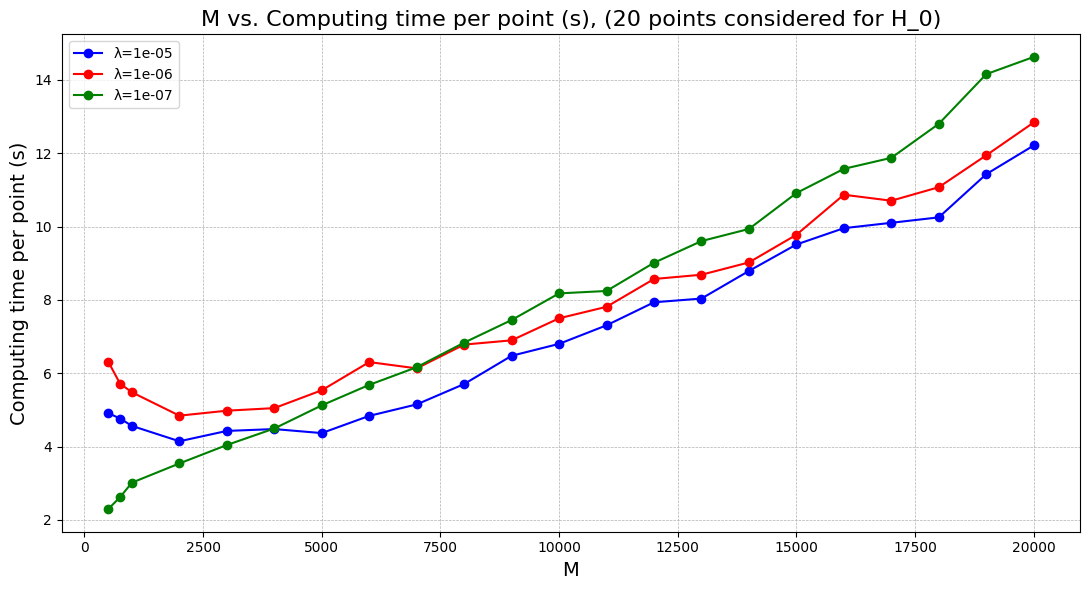

In [13]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ['b','r','g']
label_list = [f'λ={lam}' for lam in lam_list]


plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, null_hp_times[i]/niter,  capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing time per point (s)", fontsize=14)
plt.title(f"M vs. Computing time per point (s), ({niter} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Computing_time_vs_M.pdf", format="pdf")
plt.show()


File results/100D_unimodal/100D_100K_NPLM_Par/null_hypothesis/test_statistic_fluc_M_lam.json already exists. Loading existing results.
Average test statistic values for lambda = 1e-05 varying M: [432.74242603 493.93755436 532.10490427 600.28682121 622.70213582
 634.39236936 641.51534202 646.72674861 650.52879318 653.44274804
 655.68113356 657.46305597 658.95722601 660.18679459 661.11705188
 662.01561358 662.76212363 663.40424285 663.85874715 664.29552021
 664.76243034 665.16464629]
 with std: [31.95184481 29.94780047 28.86166509 29.06509886 29.03865767 29.64572006
 29.63295524 29.73998282 29.76041558 29.73831051 29.7885311  29.78287577
 29.77209934 29.79603912 29.8010398  29.80882138 29.79898288 29.80355653
 29.85166573 29.8077834  29.81103594 29.80846132]
Average test statistic values for lambda = 1e-06 varying M: [ 795.62414308 1071.86542167 1255.42231118 1594.86409756 1726.07582321
 1805.97035283 1858.31591997 1898.61647561 1929.21833127 1953.2416464
 1972.17380553 1987.57965983 200

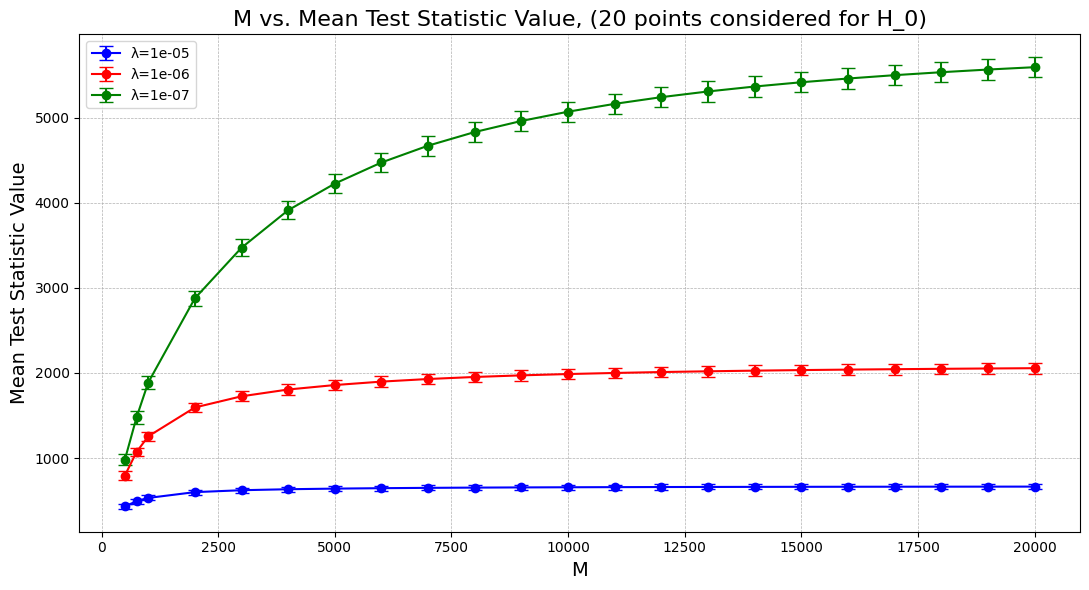

In [14]:
file = null_hypotheses_dir + f"test_statistic_fluc_M_lam.json"

null_hp_times = np.zeros((len(lam_list), len(M_list)))
metric_values = np.zeros((len(lam_list), len(M_list), niter))

if os.path.exists(file):
    print(f"File {file} already exists. Loading existing results.")
    with open(file, "r") as f:
        results = json.load(f)
    lam_list = [lam for result in results for lam in result["lam"].keys()]
    lam_list = np.array(lam_list)
    M_list = [item["M"] for item in results[0]["lam"][lam_list[0]]]
    for i, result in enumerate(results):
        for lam, lam_data in result["lam"].items():
            for j, M_data in enumerate(lam_data):  # For each M value in the lambda
            
                null_hp_times[i, j] = M_data["computing_time"]
                metric_values[i, j] = M_data["metric_list"]
                null_hp_times = np.array(null_hp_times)
                metric_values = np.array(metric_values)
                
else:
    print("file does not exist")
    

color_list = ['b','r','g']
label_list = [f'λ={lam}' for lam in lam_list]

avg_test_stat = np.zeros((len(lam_list), len(M_list)))
std_test_stat = np.zeros((len(lam_list), len(M_list)))

for i, lam in enumerate(lam_list):
    for j, m in enumerate(M_list):
        avg_test_stat[i,j] = (np.mean(metric_values[i,j]))
        std_test_stat[i,j] = (np.std(metric_values[i,j]))
    print(f"Average test statistic values for lambda = {lam} varying M: {avg_test_stat[i]}\n"
          f" with std: {std_test_stat[i]}")

plt.figure(figsize=(11, 6))
for i in range(len(lam_list)):
    plt.errorbar(M_list, avg_test_stat[i], std_test_stat[i], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0)", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.savefig(null_hypotheses_dir+"Test_statistic_fluc_vs_M.pdf", format="pdf")
plt.show()
